In [3]:
import geopandas as gpd

In [4]:
df = gpd.read_file('cal_median_household.csv')

In [5]:
df.head(10)

,field_1,County,FIPS,Value (Dollars),Rank within US (of 3141 counties)
0,0,Trinity,06105,"53,498","2,457"
1,1,Siskiyou,06093,"55,499","2,309"
2,2,Imperial,06025,"56,393","2,246"
3,3,Modoc,06049,"56,648","2,221"
4,4,Lake,06033,"58,738","2,055"
5,5,Sierra,06091,"60,000","1,915"
6,6,Humboldt,06023,"61,135","1,802"
7,7,Tehama,06103,"61,834","1,739"
8,8,Lassen,06035,"64,395","1,515"
9,9,Mendocino,06045,"64,688","1,476"


In [6]:
df['County'] = [s.split(' ')[0] for s in df.County]

In [7]:
df.head(10)


,field_1,County,FIPS,Value (Dollars),Rank within US (of 3141 counties)
0,0,Trinity,06105,"53,498","2,457"
1,1,Siskiyou,06093,"55,499","2,309"
2,2,Imperial,06025,"56,393","2,246"
3,3,Modoc,06049,"56,648","2,221"
4,4,Lake,06033,"58,738","2,055"
5,5,Sierra,06091,"60,000","1,915"
6,6,Humboldt,06023,"61,135","1,802"
7,7,Tehama,06103,"61,834","1,739"
8,8,Lassen,06035,"64,395","1,515"
9,9,Mendocino,06045,"64,688","1,476"


In [8]:
df.to_csv('cal_median_household.csv')

# Below is stuff for fires_example

In [9]:
import geopandas as gpd
import xarray as xr
import rioxarray
from pathlib import Path

In [17]:
gjson = Path().cwd().parent / 'untracked_qgis/aoi.geojson'
df = gpd.read_file(gjson)

In [23]:
for y in range(2016, 2026):
    vrt = Path(f'/home/michael/data/trinity_trees/sentinel2/s2_{y}.vrt')
    xa = rioxarray.open_rasterio(vrt)
    df = df.to_crs(xa.rio.crs)
    clipped = xa.rio.clip_box(*df.total_bounds)
    file_path = gjson.parent / f's2_{y}.tif'
    clipped.rio.to_raster(file_path)

    if file_path.exists() and file_path.is_file():
        print(f"The file '{file_path}' was successfully written and exists.")
    else:
        print(f"The file '{file_path}' was not found or is not a regular file.")

The file '/home/michael/Work/nr218/untracked_qgis/s2_2016.tif' was successfully written and exists.
The file '/home/michael/Work/nr218/untracked_qgis/s2_2017.tif' was successfully written and exists.
The file '/home/michael/Work/nr218/untracked_qgis/s2_2018.tif' was successfully written and exists.
The file '/home/michael/Work/nr218/untracked_qgis/s2_2019.tif' was successfully written and exists.
The file '/home/michael/Work/nr218/untracked_qgis/s2_2020.tif' was successfully written and exists.
The file '/home/michael/Work/nr218/untracked_qgis/s2_2021.tif' was successfully written and exists.
The file '/home/michael/Work/nr218/untracked_qgis/s2_2022.tif' was successfully written and exists.
The file '/home/michael/Work/nr218/untracked_qgis/s2_2023.tif' was successfully written and exists.
The file '/home/michael/Work/nr218/untracked_qgis/s2_2024.tif' was successfully written and exists.
The file '/home/michael/Work/nr218/untracked_qgis/s2_2025.tif' was successfully written and exists.


In [19]:
import contextily as cx

NameError: name 'scalebar' is not defined

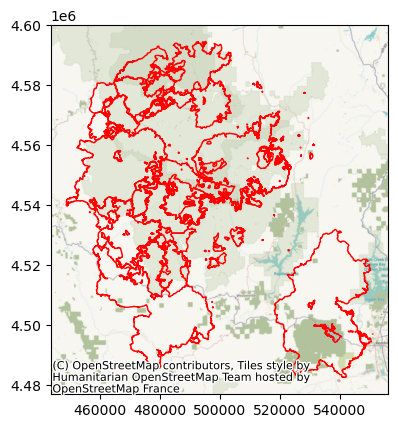

In [25]:
# plot fire perimeter in red
ax = df.plot(edgecolor='red', facecolor='none')
# add basemap
cx.add_basemap(ax, crs=df.crs)
ax.add_artist(scalebar);